In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from statsmodels.tsa.stattools import adfuller

C:\Users\Hi\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Traffic forecast 
-P.Viswanadh

In [3]:
df=pd.read_csv("Train_fb.csv")

In [4]:
df.head(5)

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [5]:
from prophet import Prophet

# Preprocessing

In [6]:
df["Datetime"]=pd.to_datetime(df["Datetime"],format="%d-%m-%Y %H:%M")

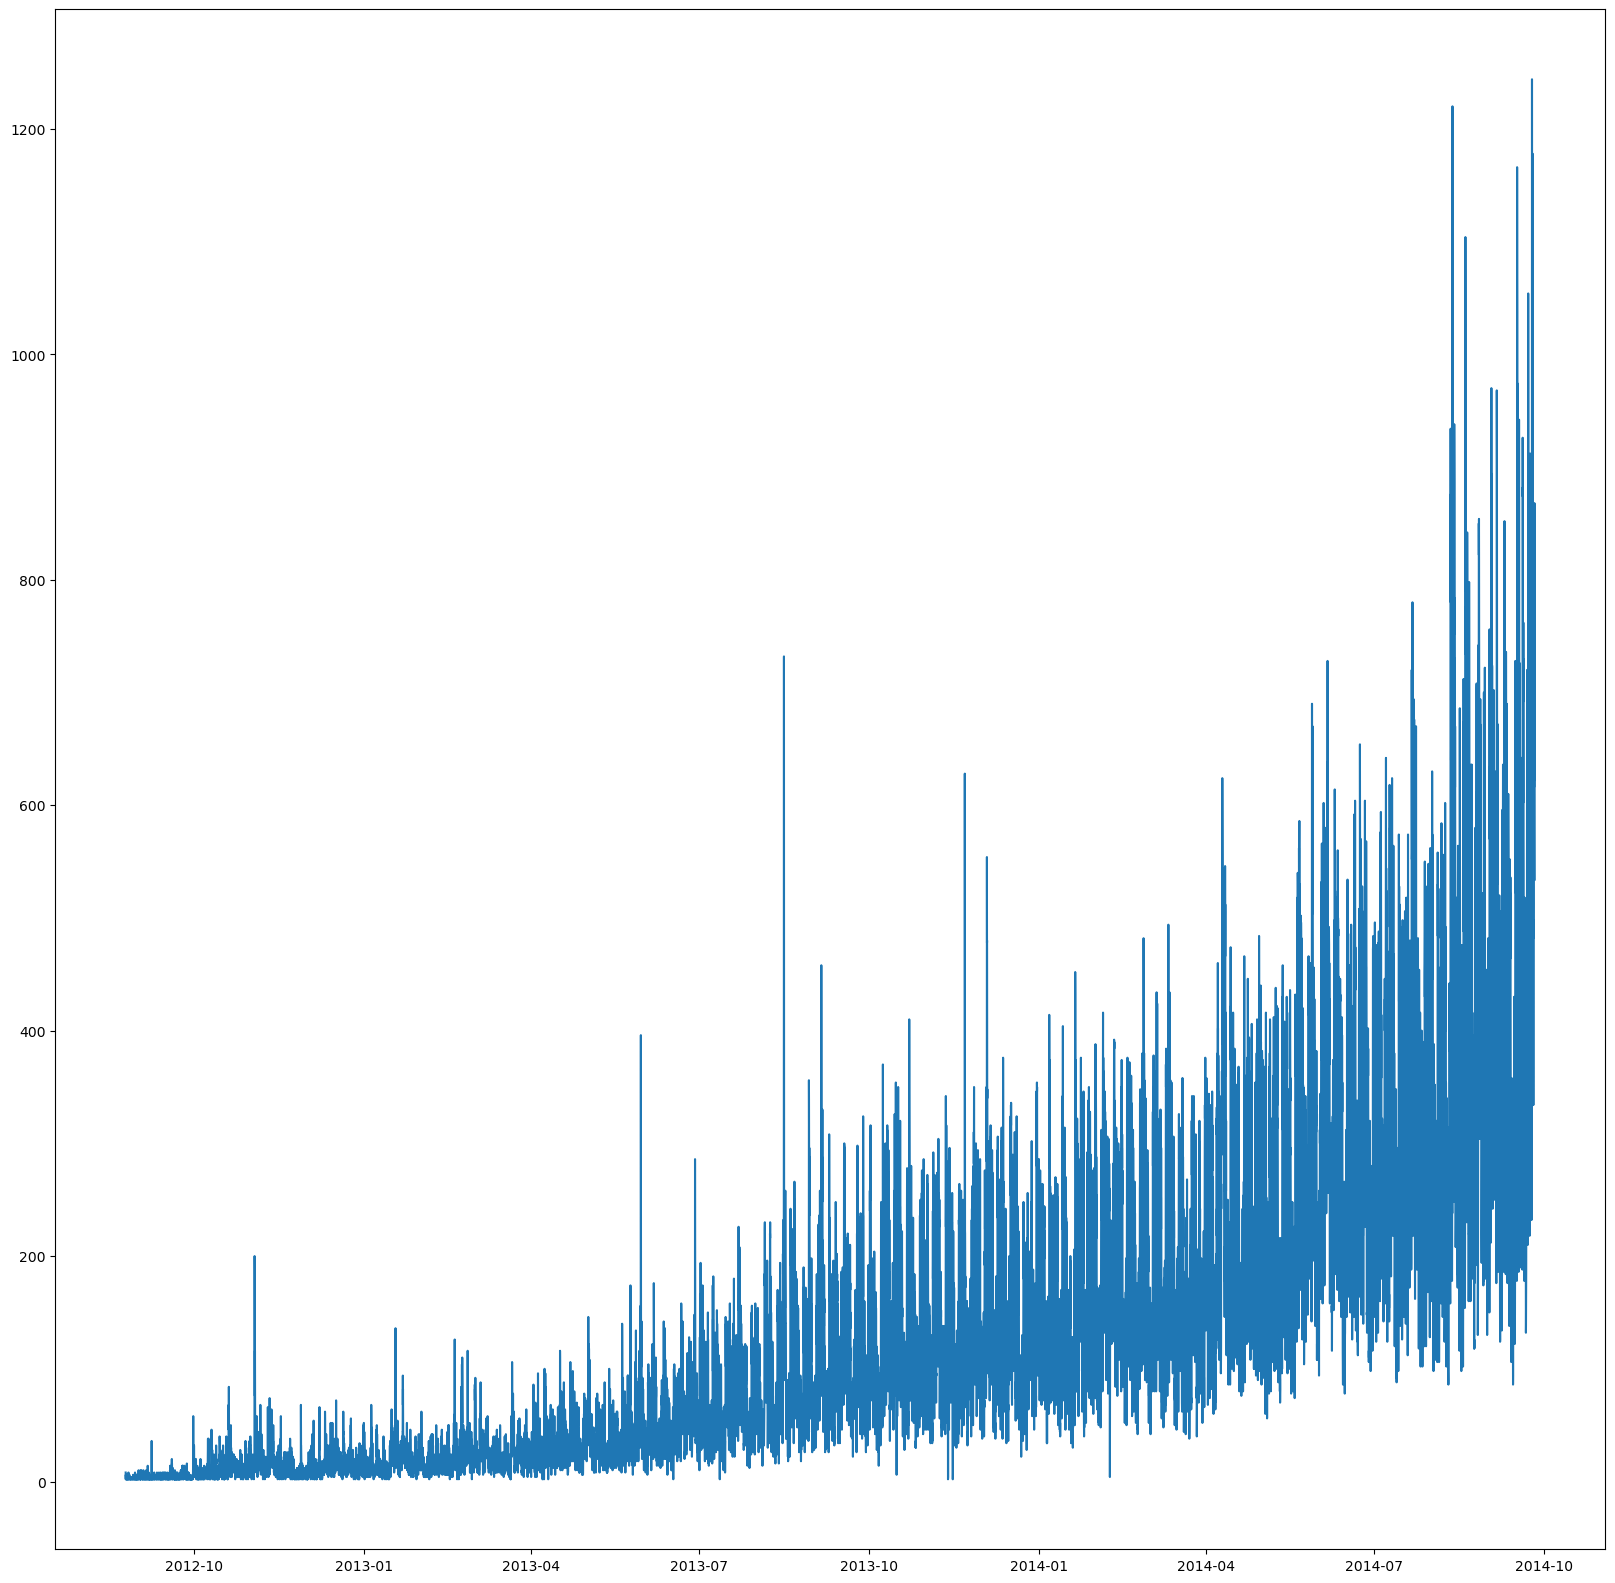

In [7]:
plt.figure(figsize=(20,20))
plt.plot(df["Datetime"],df["Count"])

In [8]:
df.index=df['Datetime']
df['y']=df['Count']
df.drop(columns=['Count','Datetime','ID'],axis=1,inplace=True)

In [9]:
df.head(5)

,y
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2


In [10]:
df=df.resample('D').sum()

In [11]:
df.head(5)

,y
Datetime,
2012-08-25,76
2012-08-26,88
2012-08-27,62
2012-08-28,58
2012-08-29,60


In [12]:
len(df)

762

In [13]:
model_p=Prophet()

In [14]:
df.reset_index(inplace=True)

In [15]:
df.rename(columns={'Datetime':'ds','y':'y'},inplace=True)

In [16]:
df.shape

(762, 2)

In [17]:
df.head(5)

,ds,y
0,2012-08-25,76
1,2012-08-26,88
2,2012-08-27,62
3,2012-08-28,58
4,2012-08-29,60


In [18]:
result=adfuller(df["y"])

In [19]:
print(result)

(2.986350959013848, 1.0, 20, 741, {'1%': -3.4392057325732104, '5%': -2.8654483492874236, '10%': -2.5688512291811225}, 11921.943836159979)


In [20]:
print(result[1])

1.0


The given data in non-stationary and hence we need to apply differencing to make it stationary.
FBProphet can hande data that is not-stationary,unlike other models.

In [21]:
m=model_p.fit(df)

18:58:08 - cmdstanpy - INFO - Chain [1] start processing
18:58:08 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
future=m.make_future_dataframe(periods=30)

In [23]:
forecast=m.predict(future)

# Forecasting predictions

<AxesSubplot:>

<Figure size 2000x2000 with 0 Axes>

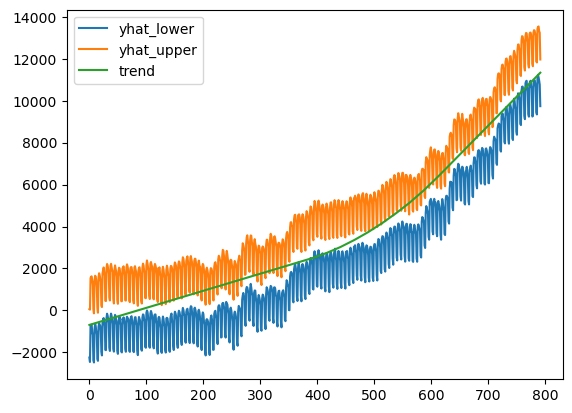

In [24]:
plt.figure(figsize=(20,20))
soothsay=forecast[["yhat_lower","yhat_upper","trend"]]
soothsay.plot(kind="line")

In [25]:
def forecast(days):
    future=m.make_future_dataframe(periods=days)
    forecast=m.predict(future)
    soothsay=forecast[["yhat_lower","yhat_upper","trend"]]
    soothsay.plot(kind="line")
    
    

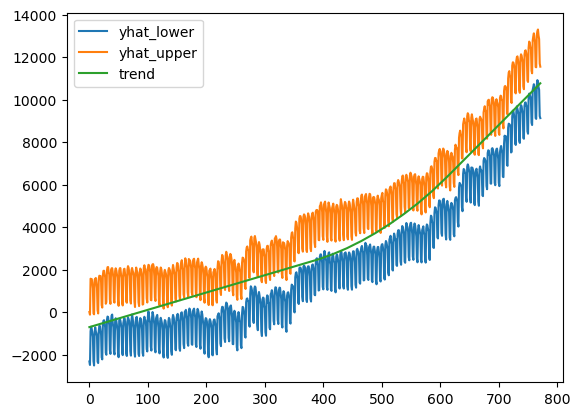

In [26]:
forecast(10)

In [27]:
df.head(10)

,ds,y
0,2012-08-25,76
1,2012-08-26,88
2,2012-08-27,62
3,2012-08-28,58
4,2012-08-29,60
5,2012-08-30,74
6,2012-08-31,78
7,2012-09-01,112
8,2012-09-02,118
9,2012-09-03,108


In [28]:
df.tail(10)

,ds,y
752,2014-09-16,16080
753,2014-09-17,13676
754,2014-09-18,11000
755,2014-09-19,13034
756,2014-09-20,8186
757,2014-09-21,9102
758,2014-09-22,14116
759,2014-09-23,13304
760,2014-09-24,16856
761,2014-09-25,14152


# Implementing LSTM

In [29]:
df2=df[:750]

In [30]:
df2.head(5)

,ds,y
0,2012-08-25,76
1,2012-08-26,88
2,2012-08-27,62
3,2012-08-28,58
4,2012-08-29,60


In [31]:
df2.drop("ds",axis=1,inplace=True)

C:\Users\Hi\AppData\Local\Temp\ipykernel_7228\1533910961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop("ds",axis=1,inplace=True)


In [32]:
df2

,y
0,76
1,88
2,62
3,58
4,60
...,...
745,13104
746,11592
747,10180
748,9010


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM

In [34]:
length=25
n_features=1

In [35]:
model=Sequential()
model.add(LSTM(25,activation="relu",input_shape=(length,n_features)))
model.add(Dense(1))

C:\Users\Hi\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
model.compile(optimizer="adam",loss="mse")

In [37]:
df2.head()

,y
0,76
1,88
2,62
3,58
4,60


In [38]:
df2['y']=df2['y'].diff().diff()

C:\Users\Hi\AppData\Local\Temp\ipykernel_7228\1833530904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['y']=df2['y'].diff().diff()


In [39]:
df2['y']

0         NaN
1         NaN
2       -38.0
3        22.0
4         6.0
        ...  
745    -468.0
746   -4392.0
747     100.0
748     242.0
749   -1760.0
Name: y, Length: 750, dtype: float64

In [40]:
scaled_train=df2[2:725]

In [41]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [42]:
scaled_train=np.asarray(scaled_train)

In [43]:
scaled_train.shape

(723, 1)

In [44]:
scaled_train=scaled_train.reshape(-1,1)

In [45]:
batch_size=1
generator=TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=batch_size)

In [46]:
model.fit(generator,epochs=5)

Epoch 1/5
 24/698 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1802451.7500

C:\Users\Hi\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


698/698 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 2270404.7500
Epoch 2/5
698/698 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 2678515.0000
Epoch 3/5
698/698 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2122498.2500
Epoch 4/5
698/698 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2451842.0000
Epoch 5/5
698/698 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2311932.7500


In [47]:
generator[0]

(array([[[ -38.],
         [  22.],
         [   6.],
         [  12.],
         [ -10.],
         [  30.],
         [ -28.],
         [ -16.],
         [ -32.],
         [  80.],
         [ -42.],
         [ -28.],
         [  64.],
         [ -64.],
         [  28.],
         [  -2.],
         [  32.],
         [ -38.],
         [  24.],
         [  -4.],
         [ -30.],
         [  44.],
         [  74.],
         [-126.],
         [ -44.]]]),
 array([[80.]]))

In [48]:
df2.iloc[25]

y   -126.0
Name: 25, dtype: float64

# Time Series Generator has generated the same value

# evaluation

In [49]:
first_eval_batch=scaled_train[-length:]

In [50]:
first_eval_batch

array([[  334.],
       [  162.],
       [ 2920.],
       [-2780.],
       [  608.],
       [  -38.],
       [  204.],
       [-3354.],
       [ 1970.],
       [ 4470.],
       [-4680.],
       [ 2594.],
       [-2580.],
       [ 1504.],
       [-3314.],
       [ 3304.],
       [ 6746.],
       [-5272.],
       [-1718.],
       [-5322.],
       [ 3966.],
       [  432.],
       [  -66.],
       [ 4036.],
       [   30.]])

In [51]:
np.shape(first_eval_batch)

(25, 1)

In [52]:
first_eval_batch=first_eval_batch.reshape((1,length,n_features))

In [53]:
model.predict(first_eval_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


array([[-1405.7917]], dtype=float32)

In [54]:
df2.iloc[725]

y   -4274.0
Name: 725, dtype: float64

In [55]:
results=[]
i=25
sliding_set=df2.iloc[701:726]
while i!=0:    
    sliding_set=np.asarray(sliding_set)
    sliding_set=sliding_set.reshape((1,length,n_features))
    ans=model.predict(sliding_set)
    print(ans)
    results.append(ans.tolist()[0][0])
    sliding_set=sliding_set.reshape(-1)
    sliding_set=sliding_set.tolist()
    sliding_set.pop(0)
    sliding_set.append(ans.tolist()[0][0])
    i-=1
    

 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[1683.3784]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[379.5709]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[-110.42296]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[1740.0916]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[-662.1492]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[3251.0447]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[-1053.1417]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[590.9271]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[-228.21342]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[167.58072]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[341.65576]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[125.9832]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[310.88083]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[2330.3635]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[22.607403]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[-108.89914]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[754.4873]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[357.96442]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[136.02739]]
1/1 ━━━━━━━━

In [56]:
results_df=pd.DataFrame(results)

In [57]:
results_df.head(5)

,0
0,1683.378418
1,379.570892
2,-110.422958
3,1740.091553
4,-662.149170


<AxesSubplot:>

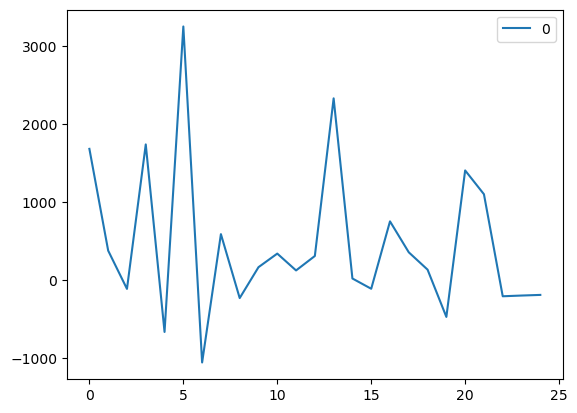

In [58]:
results_df.plot(kind="line")

# FBPROPHET VS LSTM

In [59]:
df3=df[:725]

In [60]:
df3.head(5)

,ds,y
0,2012-08-25,76
1,2012-08-26,88
2,2012-08-27,62
3,2012-08-28,58
4,2012-08-29,60


In [61]:
model_p2=Prophet()

In [62]:
m2=model_p2.fit(df3)

18:58:33 - cmdstanpy - INFO - Chain [1] start processing
18:58:33 - cmdstanpy - INFO - Chain [1] done processing


In [63]:
future=m2.make_future_dataframe(periods=25)

In [64]:
predict=m2.predict(future)

In [65]:
predict_df=predict[["yhat"]]

In [66]:
predict_df.head(5)

,yhat
0,-862.950925
1,-992.204882
2,498.268768
3,542.368944
4,489.934412


In [67]:
predict_df.shape

(750, 1)

In [68]:
predict_df2=predict_df.iloc[724:]

In [69]:
predict_df2.reset_index(inplace=True)

In [70]:
predict_df2.drop("index",inplace=True,axis=1)

C:\Users\Hi\AppData\Local\Temp\ipykernel_7228\255349748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_df2.drop("index",inplace=True,axis=1)


In [71]:
predict_df2.head(5)

,yhat
0,9627.406777
1,9599.041830
2,9545.769993
3,9359.081278
4,8340.436722


In [72]:
df3=df2.iloc[726:751]

In [73]:
df3.head(5)

,y
726,12.0
727,62.0
728,-1654.0
729,2740.0
730,3326.0


In [74]:
df3.tail(5)

,y
745,-468.0
746,-4392.0
747,100.0
748,242.0
749,-1760.0


In [75]:
df3.reset_index(inplace=True)

In [76]:
df3.head(5)

,index,y
0,726,12.0
1,727,62.0
2,728,-1654.0
3,729,2740.0
4,730,3326.0


In [77]:
df3.drop("index",inplace=True,axis=1)

C:\Users\Hi\AppData\Local\Temp\ipykernel_7228\3754134366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop("index",inplace=True,axis=1)


In [78]:
results_df.head(5)

,0
0,1683.378418
1,379.570892
2,-110.422958
3,1740.091553
4,-662.149170


In [79]:
results_concat=pd.concat([predict_df2,results_df,df3],axis=1)

In [80]:
results_concat.rename(columns={0:"LSTM","yhat":"FBPROPHET","y":"Actual"},inplace=True)

In [81]:
results_concat

,FBPROPHET,LSTM,Actual
0,9627.406777,1683.378418,12.0
1,9599.041830,379.570892,62.0
2,9545.769993,-110.422958,-1654.0
3,9359.081278,1740.091553,2740.0
4,8340.436722,-662.149170,3326.0
5,8235.252350,3251.044678,-1658.0
6,9749.795585,-1053.141724,-1760.0
7,9817.965346,590.927124,-3380.0
8,9789.600399,-228.213425,4222.0
9,9736.328562,167.580719,-2296.0


<AxesSubplot:>

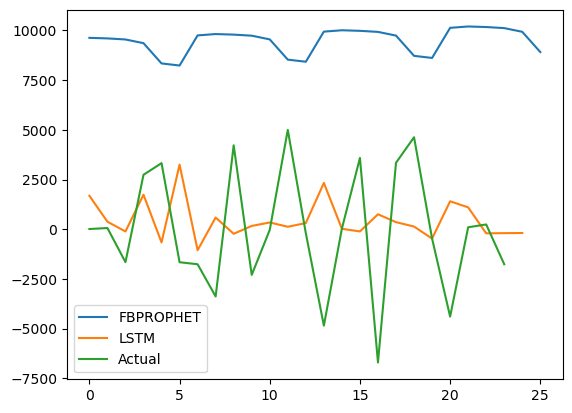

In [82]:
results_concat.plot()